# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
#df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')

In [3]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000)

In [4]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

* *Tip: there's an option with `.read_csv` to only read in a certain number of rows*

In [5]:
df.shape[0]

30000

In [6]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

<font color="blue">**my answer**:</font><br>
Each row is a registered pet<br><br>
`Owner Zip Code` is a zip code of the owner of the pet<br>
`Vaccinated` is whether the pet is vaccinated or not <YES/NO><br>

In [7]:
df.Vaccinated.unique()

array(['Yes', 'No'], dtype=object)

In [8]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

<font color="blue">**my answer**:</font><br>
<li>What percentage of the pets are vaccinated?</li>
<li>What percentage of the pets are guard or trained?</li>
<li>What percentage of the pets are spayed or neut?</li>
<li>What are the popular breeds?</li>
<li>Is license issued without delay for all the owners?</li>
<li>If there are pets with shorter duration of licence, why is it? Are there any difference by vaccination status or training status etc?</li>

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [9]:
df['Primary Breed'].unique()

array(['Unknown', 'Rottweiler', 'Australian Cattledog', 'Basenji',
       'Akita Crossbreed', 'American Pit Bull Mix / Pit Bull Mix',
       'Boxer', 'Labrador Retriever Crossbreed', 'Maltese', 'Beagle',
       'Cavalier King Charles Spaniel', 'Poodle, Standard',
       'Dachshund Smooth Coat Miniature', 'Havanese', 'Bull Terrier',
       'German Shepherd Dog', 'American Pit Bull Terrier/Pit Bull',
       'Bull Dog, French', 'Yorkshire Terrier', 'Dachshund Smooth Coat',
       'Schnauzer, Miniature', 'German Shorthaired Pointer',
       'Golden Retriever', 'Boston Terrier', 'Labrador Retriever',
       'Norfolk Terrier', 'Dachshund, Long Haired', 'Bichon Frise',
       'Poodle, Miniature', 'Chihuahua', 'Shih Tzu', 'Collie, Border',
       'Collie, Smooth Coat', 'French Bulldog', 'Lhasa Apso', 'Puggle',
       'Bull Dog, English', 'Siberian Husky', 'Kooikerhondje',
       'American Eskimo dog', 'Portuguese Water Dog', 'Poodle',
       'Cocker Spaniel', 'Labradoodle', 'Shiba Inu', 'Poodl

In [10]:
df.loc[df['Primary Breed'].str.contains('know',na=False),'Primary Breed'].unique()

array(['Unknown'], dtype=object)

In [11]:
df['Primary Breed'] = df['Primary Breed'].replace('Unknown', np.nan)

In [12]:
df['Primary Breed'].value_counts().head(10)

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: Primary Breed, dtype: int64

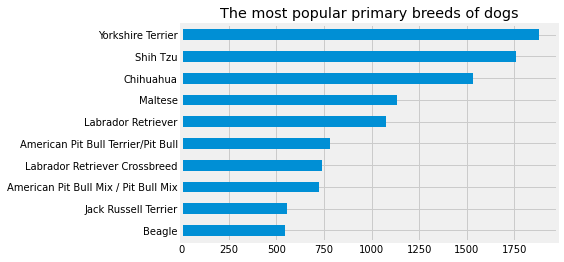

In [13]:
df['Primary Breed'].value_counts().head(10).sort_values().plot(kind='barh')
plt.title('The most popular primary breeds of dogs')
plt.show()

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

* *Tip: Maybe you want to go back to your `.read_csv` and use `na_values=`? Maybe not? Up to you!*

In [14]:
#I have done it with 3.1

## What are the most popular dog names?

In [15]:
df['Animal Name'].value_counts()

UNKNOWN          203
Max              202
Unknown          197
Bella            193
Charlie          172
                ... 
Bluno              1
DARBY              1
CHARLEY VIVAR      1
TINY               1
Squeeze            1
Name: Animal Name, Length: 13721, dtype: int64

In [16]:
#replace names "Unknown" with np.nan
df.loc[df['Animal Name'].str.contains('unknown', case=False, na=False),'Animal Name'] =np.nan

In [17]:
df['Animal Name'].value_counts().head(10)

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [18]:
df['Animal Name'] = df['Animal Name'].apply(lambda x: str(x).strip())

In [19]:
df['Animal Name'] = df['Animal Name'].replace('nan', np.nan)

In [20]:
df.loc[df['Animal Name'].str.contains('Max', case=False, na=False),'Animal Name'].unique()

array(['Max', 'Maximus', 'Maxx  AKA Carter', 'Maxi', 'MAX', 'max',
       'Max Marder Klein', 'MAXINE', 'Maxwell', 'Maxx',
       'Maximilian Court Krsnak', 'MAXIMUS', 'Max Fincher', 'MAX PEPPER',
       'Maximillion Alberich', 'Maxi Rodriguez', 'Maximus Mushyakov',
       'Maximilian', 'max torres', 'Max Bailey', 'Maxwell Miller',
       'Max Buddy Boy', 'Max Troni', 'Maxemillian Pegases', 'Maxy',
       'Blue Maxius', 'Max Di Marco', 'Maximus Von Warrior - Lemon',
       'Max Pila', 'Maxflower', 'Max Ortiz', 'Maximo', 'Maxxie',
       'Max Whang', 'MAXWELL', 'MAXIE', 'Buddy Max', 'Max Caminiti',
       'Maximillia', 'Maximillion', 'MAXAILLION', 'BROWNIE MAXIMILIANO',
       'MAX POWER', 'Max Rodriguez', 'Max Feldman', 'MAX LEAR',
       'Max Whitfield', 'MAXIMUS GARCIA', 'Maxine',
       'Maximus Prime Berrios', 'Maximus D.', 'MAXWELL ED', 'Maxie',
       'maximillion', 'maximus', 'Max Brewer', 'Billy Max', 'maxi',
       'MAXX', 'Max Garcia', 'Lucky Max', 'MAX A MILL', 'Max Suarez',

In [21]:
#All the names that includes "max"
df[df['Animal Name'].str.contains('Max', case=False, na=False)].shape[0]

504

In [22]:
#"Max"
#but there could be other Max such as 'MAX', 'max'
df[df['Animal Name']=='Max'].shape[0]

220

In [23]:
#"max"
#but there could still be other Max such as'max'
df[df['Animal Name']=='max'].shape[0]

12

In [24]:
#"Max","MAX", "max", etc.
df[df['Animal Name'].str.contains('^Max$', regex=True, case=False, na=False)].shape[0]

297

In [25]:
#"Maxwell","MAXWELL" etc.
df[df['Animal Name'].str.contains('^Maxwell$',case=False,na=False)].shape[0]

16

## What percentage of dogs are guard dogs?

In [26]:
df['Guard or Trained'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [27]:
df['Guard or Trained'].value_counts(normalize=True) *100

No     99.914254
Yes     0.085746
Name: Guard or Trained, dtype: float64

In [28]:
df['Guard or Trained'].value_counts(dropna=False, normalize=True) *100

No     66.030000
NaN    33.913333
Yes     0.056667
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [29]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`. Think about missing data!

In [30]:
df['Guard or Trained'].value_counts().sum()

19826

## Maybe fill in all of those empty "Guard or Trained" columns with "No"? Or as `NaN`? 

Can we make an assumption either way? Then check your result with another `.value_counts()`

In [31]:
df['Guard or Trained'].value_counts(dropna=False, normalize=True) *100

No     66.030000
NaN    33.913333
Yes     0.056667
Name: Guard or Trained, dtype: float64

## What are the top dog breeds for guard dogs? 

In [32]:
df.loc[df['Guard or Trained']=='Yes','Primary Breed'].value_counts()

German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [33]:
df['year'] = df['Animal Birth'].apply(lambda x: x.year)

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [34]:
df['age'] = 2022 - df.year

In [35]:
#average age of dogs
df.age.mean()

12.712433333333333

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [36]:
zipcode = pd.read_csv('zipcodes-neighborhoods.csv')

In [37]:
zipcode.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [38]:
zipcode.dtypes

neighborhood    object
zip              int64
borough         object
dtype: object

In [39]:
zipcode.borough.unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [40]:
zipcode.neighborhood.unique()

array(['Central Bronx', 'Bronx Park and Fordham',
       'High Bridge and Morrisania', 'Hunts Point and Mott Haven',
       'Kingsbridge and Riverdale', 'Northeast Bronx', 'Southeast Bronx',
       'Central Brooklyn', 'Southwest Brooklyn', 'Borough Park',
       'Canarsie and Flatlands', 'Southern Brooklyn',
       'Northwest Brooklyn', 'Flatbush', 'East New York and New Lots',
       'Greenpoint', 'Sunset Park', 'Bushwick and Williamsburg',
       'Central Harlem', 'Chelsea and Clinton', 'East Harlem',
       'Gramercy Park and Murray Hill', 'Greenwich Village and Soho',
       'Lower Manhattan', 'Lower East Side', 'Upper East Side',
       'Upper West Side', 'Inwood and Washington Heights',
       'Northeast Queens', 'North Queens', 'Central Queens', 'Jamaica',
       'Northwest Queens', 'West Central Queens', 'Rockaways',
       'Southeast Queens', 'Southwest Queens', 'West Queens',
       'Port Richmond', 'South Shore', 'Stapleton and St. George',
       'Mid-Island'], dtype=object

In [41]:
df = df.merge(zipcode, left_on='Owner Zip Code', right_on='zip')

In [42]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,10024,Manhattan
1,10024,Louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,14,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,11,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,11,Upper West Side,10024,Manhattan
4,10024,Harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,15,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

You'll want to do these separately, and filter for each.

In [43]:
df[df.borough=='Bronx']['Animal Name'].value_counts().head()

Rocky       23
Bella       23
Max         21
Princess    17
Lucky       15
Name: Animal Name, dtype: int64

In [44]:
df[df.borough=='Brooklyn']['Animal Name'].value_counts().head()

Max        52
Bella      46
Charlie    43
Rocky      39
Lucy       37
Name: Animal Name, dtype: int64

In [45]:
df[df.neighborhood=='Upper East Side']['Animal Name'].value_counts().head()

Charlie    19
Bella      13
Lola       11
NO NAME    11
Lucy       11
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

* *Tip: There are a few ways to do this, and some are awful (see the "top 5 breeds in each borough" question below).*

In [46]:
df.neighborhood.unique()

array(['Upper West Side', 'Southeast Bronx', 'Greenwich Village and Soho',
       'East Harlem', 'Upper East Side', 'Sunset Park',
       'Gramercy Park and Murray Hill', 'Southwest Brooklyn',
       'Northwest Brooklyn', 'South Shore', 'Lower East Side',
       'Borough Park', 'East New York and New Lots', 'Central Brooklyn',
       'Kingsbridge and Riverdale', 'Chelsea and Clinton',
       'Stapleton and St. George', 'Northeast Queens',
       'Canarsie and Flatlands', 'Southern Brooklyn', 'Northwest Queens',
       'West Central Queens', 'Bronx Park and Fordham', 'Lower Manhattan',
       'High Bridge and Morrisania', 'Inwood and Washington Heights',
       'Jamaica', 'Greenpoint', 'Northeast Bronx', 'Central Harlem',
       'Central Queens', 'Bushwick and Williamsburg', 'North Queens',
       'Mid-Island', 'Southeast Queens', 'West Queens', 'Port Richmond',
       'Rockaways', 'Southwest Queens', 'Flatbush',
       'Hunts Point and Mott Haven', 'Central Bronx'], dtype=object)

In [72]:
#count numbers of dogs of each breed in each neighborhood
breed_by_location = df.groupby(['neighborhood','Primary Breed']).count()[['borough']]
breed_by_location = breed_by_location.rename(columns={'borough':'number_of_dogs'})

In [73]:
#rank
breed_by_location['local_rank'] = breed_by_location.groupby(level=[0]).rank(method="min",ascending=False)

In [77]:
#show as a table
breed_by_location = breed_by_location.local_rank.unstack()

In [93]:
#sort & filter top5
sort_order = breed_by_location.mean().sort_values().index.to_list()
top5_breed_by_location = breed_by_location[sort_order].where(breed_by_location<=5).dropna(how="all").dropna(how="all",axis=1)

In [94]:
top5_breed_by_location.fillna('')

Primary Breed,Yorkshire Terrier,Shih Tzu,Chihuahua,Maltese,Labrador Retriever,Labrador Retriever Crossbreed,American Pit Bull Mix / Pit Bull Mix,American Pit Bull Terrier/Pit Bull,Beagle,Jack Russell Terrier,German Shepherd Dog,Pug,Havanese,Cavalier King Charles Spaniel,"Bull Dog, French"
neighborhood,,,,,,,,,,,,,,,
Borough Park,1.0,2.0,4.0,2.0,5.0,,,,,,,,,,
Bronx Park and Fordham,1.0,2.0,3.0,5.0,,,,4.0,,,,,,,
Bushwick and Williamsburg,1.0,2.0,2.0,,,,5.0,4.0,,,,,,,
Canarsie and Flatlands,2.0,1.0,4.0,3.0,,,5.0,,,,,,,,
Central Bronx,1.0,2.0,3.0,5.0,,,,3.0,,,,,,,
Central Brooklyn,2.0,1.0,5.0,,,,4.0,3.0,,,,,,,
Central Harlem,2.0,3.0,1.0,,,,4.0,5.0,,,,,,,
Central Queens,1.0,2.0,5.0,3.0,4.0,,,,,,,,,,
Chelsea and Clinton,2.0,3.0,1.0,,4.0,,,,,5.0,,,,,


## What breed of dogs are the least likely to be spayed? Male or female?

* *Tip: This has a handful of interpretations, and some are easier than others. Feel free to skip it if you can't figure it out to your satisfaction.*

In [95]:
df['Spayed or Neut'].unique()

array(['Yes', 'No'], dtype=object)

In [96]:
df['spayed_or_neut'] = df['Spayed or Neut'].replace({'Yes': True, 'No': False})

In [117]:
#What breed of dogs are the least likely to be spayed?
df.groupby(['Primary Breed'])['spayed_or_neut'].mean().sort_values().head(15)

Primary Breed
Borzoi                                 0.000000
Treeing Tennessee Brindle              0.000000
Dogo Argentino                         0.000000
Fila Brasileiro                        0.000000
French Spaniel                         0.000000
Karelian Bear Dog                      0.000000
Kooikerhondje                          0.000000
Polish Hound                           0.000000
Canaan Dog                             0.000000
Mudi                                   0.000000
Mastiff, French (Dogue de Bordeaux)    0.000000
Mastiff, Tibetan                       0.000000
Cardigan Welsh Corgi                   0.333333
Greater Swiss Mountain Dog             0.333333
Lagotto Romagnolo                      0.333333
Name: spayed_or_neut, dtype: float64

In [114]:
#Male or female?
df.groupby(['Primary Breed','Animal Gender']).mean().spayed_or_neut.sort_values().head(25)

Primary Breed                        Animal Gender
Affenpinscher                        F                0.00
Mastiff, Tibetan                     F                0.00
                                     M                0.00
Miniature American Shepherd          M                0.00
Lakeland Terrier                     M                0.00
Mudi                                 M                0.00
Polish Hound                         F                0.00
                                     M                0.00
Kooikerhondje                        F                0.00
Kerry Blue Terrier                   M                0.00
Karelian Bear Dog                    F                0.00
Mastiff, French (Dogue de Bordeaux)  F                0.00
Greater Swiss Mountain Dog           F                0.00
French Spaniel                       F                0.00
Fila Brasileiro                      M                0.00
Mastiff, French (Dogue de Bordeaux)  M                0.00
Canaa

In [118]:
df.groupby(['Animal Gender']).mean().spayed_or_neut.sort_values()

Animal Gender
M    0.791323
F    0.857565
     1.000000
Name: spayed_or_neut, dtype: float64

## Make a new column called `monochrome` that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [223]:
#columns
color_cols = [col for col in df.columns if 'Color' in col]

In [224]:
#check how color columns look like
df[color_cols].head()

,Animal Dominant Color,Animal Secondary Color,Animal Third Color
0,BROWN,BLACK,NaN
1,Black,White,Brown
2,BLUE MERLE,WHITE,TAN
3,Black,Brown,Silver
4,BLACK,TAN,BROWN


In [164]:
#names of colors
colors = set(df['Animal Dominant Color'])|set(df['Animal Secondary Color'])|set(df['Animal Third Color'])

In [175]:
#names of monochrome colors
mono_colors = [color for color in colors if any(mono in str(color).lower() for mono in ['black','white','gray'])]
mono_colors

['Black', 'Gray', 'BLACK', 'GRAY', 'White', 'WHITE']

In [245]:
#drop rows with na for all the 3 color columns
#fillna with "Black" so that it will be counted as True
color_df = df[color_cols].dropna(how="all").fillna('Black')

#filter rows only with mono_colors or na
color_df = color_df[color_df.isin(mono_colors).sum(axis=1)==3]

In [254]:
#create new column
#"True" for rows that are monochrome
df.loc[color_df.index, 'monochrome'] = True

#"False" for rows that are not monochrome
df.monochrome = df.monochrome.fillna(False)

In [267]:
df[df.monochrome].head(10)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough,spayed_or_neut,monochrome
10,10024,Louis,M,Portuguese Water Dog,NaN,Black,Gray,NaN,2000-11-01,Yes,...,2014-10-14 10:23:30.370,2014-10-14,2016-10-17,2000,22,Upper West Side,10024,Manhattan,True,True
12,10024,Scarlett,F,Labrador Retriever Crossbreed,NaN,BLACK,WHITE,NaN,2011-06-01,Yes,...,2014-10-24 12:33:45.760,2014-10-24,2016-11-14,2011,11,Upper West Side,10024,Manhattan,True,True
13,10024,Joey,M,Poodle,NaN,Black,White,NaN,2012-02-01,Yes,...,2014-10-27 15:54:33.130,2014-10-27,2016-10-27,2012,10,Upper West Side,10024,Manhattan,True,True
14,10024,Cooper,M,Beagle,NaN,White,NaN,NaN,2009-09-01,Yes,...,2014-10-27 15:56:07.010,2014-10-27,2016-10-27,2009,13,Upper West Side,10024,Manhattan,True,True
17,10024,Milo,M,Labrador Retriever,NaN,Black,NaN,NaN,2007-12-01,Yes,...,2014-11-07 10:38:07.667,2014-11-07,2019-11-07,2007,15,Upper West Side,10024,Manhattan,True,True
28,10024,Biggie,M,Pug,NaN,Black,NaN,NaN,2010-04-01,Yes,...,2014-12-16 12:53:32.123,2014-12-16,2017-01-24,2010,12,Upper West Side,10024,Manhattan,True,True
34,10024,Maisy Murphy,F,"Poodle, Miniature",NaN,White,NaN,NaN,2005-12-01,Yes,...,2015-01-12 13:56:19.257,2015-01-12,2020-01-12,2005,17,Upper West Side,10024,Manhattan,True,True
41,10024,REGGIE,F,Havanese,NaN,BLACK,WHITE,NaN,2001-01-01,Yes,...,2015-01-29 11:12:21.367,2015-01-29,2020-02-28,2001,21,Upper West Side,10024,Manhattan,True,True
45,10024,Brady,F,Cocker Spaniel,NaN,Black,NaN,NaN,2006-01-01,Yes,...,2015-02-03 18:44:43.660,2015-02-03,2017-02-03,2006,16,Upper West Side,10024,Manhattan,True,True
47,10024,Jazz,M,Havanese,NaN,Black,White,NaN,2013-08-01,Yes,...,2015-02-06 21:32:02.873,2015-02-06,2018-02-06,2013,9,Upper West Side,10024,Manhattan,True,True


In [270]:
#How many animals are monochrome
df.monochrome.value_counts()

False    21402
True      8171
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

In [273]:
df.borough.value_counts()

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

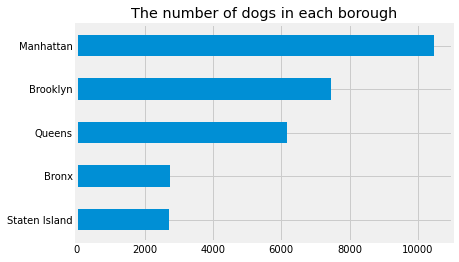

In [278]:
df.borough.value_counts().sort_values().plot(kind="barh")
plt.title("The number of dogs in each borough")
plt.show()

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [281]:
population = pd.read_csv('boro_population.csv')
population

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [294]:
borough_df = pd.DataFrame(df.borough.value_counts().rename('dogs'))

In [301]:
#number of dogs per-capita
(borough_df.dogs / population.set_index('borough').population).sort_values(ascending=False)

Manhattan        0.006371
Staten Island    0.005746
Brooklyn         0.002832
Queens           0.002631
Bronx            0.001888
dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [306]:
df['dogs_count'] = 1

In [345]:
borough_df

dogs_count
borough       Primary Breed                           
Bronx         Afghan Hound                           1
              Akita                                  5
              Akita Crossbreed                       2
              Alaskan Malamute                       2
              American Bully                         5
...                                                ...
Staten Island Wheaton Terrier                       11
              Whippet                                1
              Wire Fox Terrier                       5
              Yorkshire Terrier                    171
              Yorkshire Terrier Crossbreed           6

[899 rows x 1 columns]

In [343]:
#count number of dogs of each breed for each borough
borough_df = df.groupby(['borough','Primary Breed']).sum()[['dogs_count']]

In [451]:
#rank
borough_df['dogs_rank'] = borough_df.groupby(level=0).dogs_count.rank(ascending=False, method="min")

In [452]:
#top5 table
borough_df[borough_df.dogs_rank<=5]

dogs_count  dogs_rank
borough       Primary Breed                                            
Bronx         American Pit Bull Terrier/Pit Bull         181        4.0
              Chihuahua                                  208        3.0
              Maltese                                    139        5.0
              Shih Tzu                                   244        2.0
              Yorkshire Terrier                          250        1.0
Brooklyn      Chihuahua                                  391        3.0
              Labrador Retriever                         255        4.0
              Maltese                                    247        5.0
              Shih Tzu                                   481        2.0
              Yorkshire Terrier                          501        1.0
Manhattan     Chihuahua                                  511        1.0
              Labrador Retriever                         422        4.0
              Maltese                                    332        5.0
              Shih Tzu                                   454        3.0
              Yorkshire Terrier                          505        2.0
Queens        Chihuahua                                  306        3.0
              Labrador Retriever                         208        5.0
              Maltese                                    305        4.0
              Shih Tzu                                   395        2.0
              Yorkshire Terrier                          434        1.0
Staten Island Chihuahua                                  100        4.0
              Labrador Retriever                         123        3.0
              Maltese                                     93        5.0
              Shih Tzu                                   165        2.0
              Yorkshire Terrier                          171        1.0

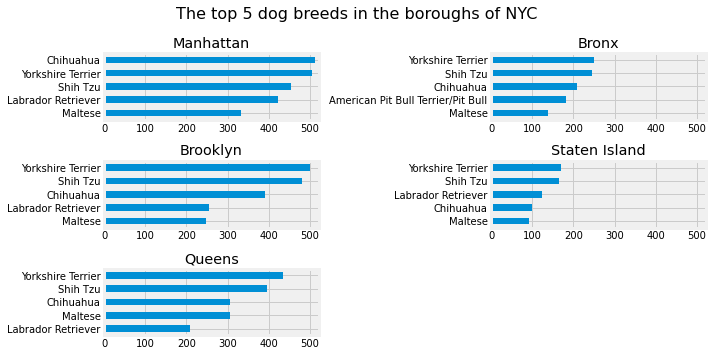

In [449]:
#data
#top5 breeds of each boroughs 
data = borough_df[borough_df.dogs_rank<=5]

fig = plt.figure(figsize=(10,5))
fig.suptitle('The top 5 dog breeds in the boroughs of NYC', fontsize=16)

xlim = data.dogs_count.max() +10

i = 1
for borough in df.borough.unique():
    ax = fig.add_subplot(3, 2, i)
    ax = data.loc[borough,'dogs_count'].rename_axis('').sort_values().plot(kind="barh")
    ax.set_xlim(0, xlim)
    ax.set_title(f"{borough}")
    i+=1

fig.tight_layout()
plt.show()